In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
data = pd.read_csv('../Data/support_ticket_data.csv', encoding='Windows-1252')
data.head()

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text
0,16582,10007217,30/06/2018,4/7/2018,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...
1,13830,10005984,15/07/2018,18/07/2018,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?
2,53794,10022738,14/10/2018,18/10/2018,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...
3,95013,10040142,1/11/2018,10/11/2018,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?
4,32660,10013924,6/6/2018,6/6/2018,1,design,"product design, website design",Are there any other colors in the bathroom sin...


In [4]:
len(data)

328

## Questions to investigate:
1) How long does it take for a support ticket to be resolved?
      - Grouping by category and looking at response time. 
2) Potential fraudulent/spam support tickets 
      - Look at time, security, services
      - Look at text column maybe classification 
          - Most common words that occur 
      - Why is 35% of the data having a negative process time 
3) What factors influence a ticket to be escalated?
     - Text (topics), theme, date created
4) Classifier which predicts the theme based on the text

In [5]:
data.groupby('Theme').count()[['SupportTicketID']].sort_values('SupportTicketID', ascending = False)

,SupportTicketID
Theme,
speed,77
price,59
features,49
services,34
reliability,31
security,26
support,21
design,18
other,13


In [6]:
data.groupby('Escalated').count()[['SupportTicketID']].sort_values('SupportTicketID', ascending = False)

,SupportTicketID
Escalated,
0,288
1,40


In [7]:
data['DateCompleted'] = pd.to_datetime(data['DateCompleted'])
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['Process Time'] = (data['DateCompleted'] - data['DateCreated']).dt.days
data

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Process Time
0,16582,10007217,2018-06-30,2018-04-07,1,price,cost of the goods to customers. compare to co...,A screwdriver costs over a hundred dollars? Wh...,-84
1,13830,10005984,2018-07-15,2018-07-18,0,speed,consider the delivery speed.,Anyway that I can rush overnight ship my order?,3
2,53794,10022738,2018-10-14,2018-10-18,0,features,"product features, website features, checkout f...",Are the shelves removable from the wine fridge...,4
3,95013,10040142,2018-01-11,2018-10-11,0,price,cost of the goods to customers. compare to co...,Are there any Christmas sales coming up?,273
4,32660,10013924,2018-06-06,2018-06-06,1,design,"product design, website design",Are there any other colors in the bathroom sin...,0
...,...,...,...,...,...,...,...,...,...
323,123579,10044731,2018-09-21,2018-09-30,0,reliability,"product reliability, website reliability, deli...",Your website is super glitchy. It won't let me...,9
324,101069,10041114,2018-01-12,2018-06-12,0,reliability,"product reliability, website reliability, deli...",Your website keeps crashing and forgetting eve...,151
325,73065,10030954,2018-03-06,2018-05-06,0,reliability,"product reliability, website reliability, deli...",Your website keeps crashing on mobile. It sucks.,61
326,52174,10022074,2018-03-06,2018-03-06,1,features,"product features, website features, checkout f...",Your website's check out system bugs when I us...,0


In [29]:
len(susProcessTime) / len(data)

0.1676829268292683

In [8]:
susProcessTime = data[data['Process Time'] < 0]
normalProcessTime = data[data['Process Time'] >= 0]

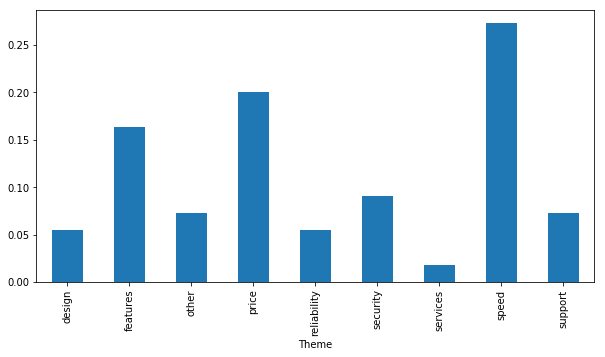

In [9]:
susInter = susProcessTime.groupby('Theme').count()['SupportTicketID'] 
susThemeCounts = susInter / sum(susInter)
plt.figure(figsize = (10, 5))
susThemeCounts.plot(kind = 'bar');

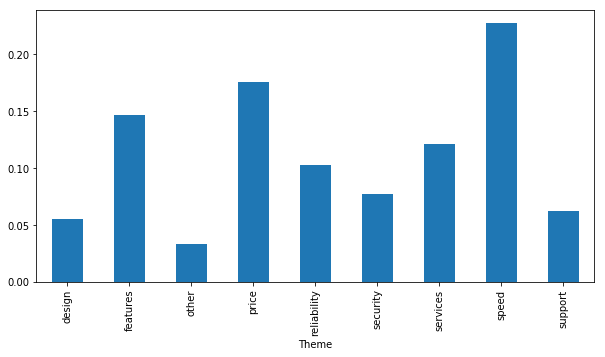

In [10]:
normalInter = normalProcessTime.groupby('Theme').count()['SupportTicketID'] 
normalThemeCounts = normalInter / sum(normalInter)
plt.figure(figsize = (10, 5))
normalThemeCounts.plot(kind = 'bar');

In [11]:
susProcessTime[susProcessTime['Theme'] == 'services']

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Process Time
245,84721,10036036,2018-05-31,2018-02-06,0,services,"delivery services, installation services, acco...",The installation team was prompt and polite. ...,-114


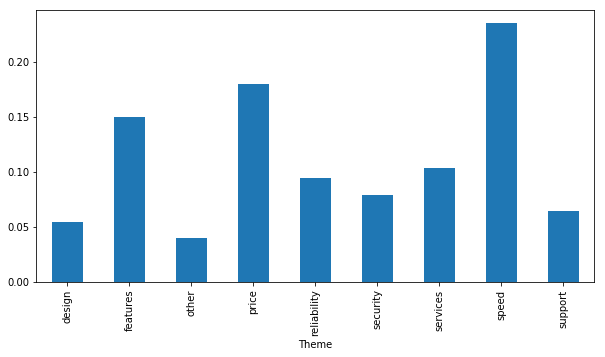

In [12]:
dataInter = data.groupby('Theme').count()['SupportTicketID'] 
dataThemeCounts = dataInter / sum(dataInter)
plt.figure(figsize = (10, 5))
dataThemeCounts.plot(kind = 'bar');

In [17]:
for i in range(50, 100):
    print(data['Text'][i])

Every time I log out of the application, and log back in, the checkout cart clears my basket history.  This is very frustrating.
Every time I try to checkout and submit the order, the screen just spins as a buffer, and I have to restart
Everything on your website is super expensive.  Do you have any coupons or discounts?
Exactly what I wanted, and it came much earlier then expected. Thank you so much!
For $100, I expected a high quality lamp.  Can we start a return, and how can I get refunded?
For an appliciance that was supposed to have high-end features, this dishwasher is a piece of junk.
Half of the time your website doesn't work. How can I order things if it isn't reliable? FIX IT!
Half the time, the dishwasher isn't reliable, stops the cycle early, and leaves food bits on my dishes
Happily married but happily reparing everything that I buy from you guys, would love to get someone to actually fix something.
Having issues checking out with PayPal.
Help! My account was hacked!
Home 

In [20]:
data.groupby('CustomerID').count()[['SupportTicketID']].sort_values('SupportTicketID', ascending = False)

,SupportTicketID
CustomerID,
10022074,2
10042279,2
10000069,1
10026988,1
10028448,1
...,...
10013924,1
10013566,1
10013489,1


In [22]:
data[data['CustomerID'].isin(['10022074', '10042279'])]

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Process Time
29,108388,10042279,2018-05-27,2018-05-06,0,features,"product features, website features, checkout f...",Can your notebooks have more grids?,-21
148,108385,10042279,2018-01-12,2018-10-12,1,features,"product features, website features, checkout f...",I wish there was a way to cancel my order afte...,273
294,52172,10022074,2018-04-11,2018-08-11,0,features,"product features, website features, checkout f...",Where can I find the FAQ on your website?,122
326,52174,10022074,2018-03-06,2018-03-06,1,features,"product features, website features, checkout f...",Your website's check out system bugs when I us...,0


In [24]:
data.groupby('Theme').mean()

,SupportTicketID,CustomerID,Escalated,Process Time
Theme,,,,
design,40997.666667,1.001740e+07,0.111111,-13.944444
features,51004.040816,1.002109e+07,0.081633,7.755102
other,52437.076923,1.002132e+07,0.307692,-14.538462
price,44565.847458,1.001855e+07,0.067797,-2.711864
reliability,62450.290323,1.002562e+07,0.161290,24.838710
security,69768.692308,1.002779e+07,0.153846,16.615385
services,48129.882353,1.002007e+07,0.147059,23.411765
speed,56560.454545,1.002318e+07,0.129870,0.909091
support,61904.380952,1.002547e+07,0.095238,-9.476190


In [25]:
data[data['Theme'] == 'other']

,SupportTicketID,CustomerID,DateCreated,DateCompleted,Escalated,Theme,Theme_Desc,Text,Process Time
39,124769,10044918,2018-12-05,2018-05-17,1,other,Just make up something!,Do you have a brick-and-mortar store or are yo...,-202
48,56718,10023981,2018-04-08,2018-05-08,1,other,Just make up something!,Doorknob broke after one use. Now I'm locked i...,30
109,22616,10009722,2018-08-18,2018-08-18,0,other,Just make up something!,I heard that your organization is sponsoring a...,0
132,7932,10003450,2018-08-16,2018-08-20,0,other,Just make up something!,I really like the ìquick boilî feature. I just...,4
151,105836,10041864,2018-10-27,2018-10-29,0,other,Just make up something!,If I have purchased an item from another retai...,2
156,99464,10040860,2018-10-31,2018-08-11,1,other,Just make up something!,"I'm moving into a new home, and I'm looking fo...",-81
160,53990,10022819,2018-12-06,2018-06-20,0,other,Just make up something!,"Instead of the pliers I ordered, I got a hard ...",-169
187,39794,10016909,2018-10-27,2018-10-29,1,other,Just make up something!,Lol I hate your customer service as a whole.,2
199,52263,10022104,2018-01-09,2018-05-09,0,other,Just make up something!,My mom said she hated the curtains. #disappoi...,120
252,31862,10013566,2018-09-18,2018-09-19,0,other,Just make up something!,The picture that I am uploading to the website...,1


In [28]:
data.groupby('Escalated').mean()

,SupportTicketID,CustomerID,Process Time
Escalated,,,
0,52625.576389,1.002168e+07,4.833333
1,60839.125000,1.002480e+07,6.425000


Data Cleaning: 
    - Group by the Theme and Escalated and take mean of positive values 

### Question: Given the customer text input, predict whether the ticket will need to be escalated and its estimated processing time. 